In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import joblib 

In [14]:
df = pd.read_csv('data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [15]:
df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [16]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)

In [ ]:
df.shape

(200, 6)

In [ ]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df["Sex"].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
66,29,1,0,0,12.856,0
144,39,1,0,0,9.664,0
118,32,0,0,1,10.292,0
110,50,1,0,0,7.490,0
36,32,1,0,1,9.445,0
...,...,...,...,...,...,...
74,31,1,0,1,17.069,4
73,41,0,2,1,22.905,4
71,28,0,2,0,19.675,4
68,54,1,2,0,24.658,4


In [ ]:

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform( df['Sex'] )
df['BP'] = label_encoder.fit_transform( df['BP'] )
df['Cholesterol'] = label_encoder.fit_transform( df['Cholesterol'] )



In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [ ]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [ ]:
df = df.sort_values('Drug')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
123,36,F,NORMAL,HIGH,16.753,DrugY
122,34,M,NORMAL,HIGH,22.456,DrugY
121,15,M,HIGH,NORMAL,17.206,DrugY
120,28,M,NORMAL,HIGH,27.064,DrugY
...,...,...,...,...,...,...
30,18,F,NORMAL,NORMAL,8.750,drugX
32,49,M,LOW,NORMAL,11.014,drugX
34,53,M,NORMAL,HIGH,14.133,drugX
132,49,M,LOW,NORMAL,13.598,drugX


In [ ]:
df['Drug'] = label_encoder.fit_transform( df['Drug'] )

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
66,29,1,0,0,12.856,0
144,39,1,0,0,9.664,0
118,32,0,0,1,10.292,0
110,50,1,0,0,7.490,0
36,32,1,0,1,9.445,0
...,...,...,...,...,...,...
74,31,1,0,1,17.069,4
73,41,0,2,1,22.905,4
71,28,0,2,0,19.675,4
68,54,1,2,0,24.658,4


In [ ]:
df['Drug'].value_counts()

Drug
4    91
3    54
0    23
1    16
2    16
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 66 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 7.8 KB


<Axes: xlabel='Age', ylabel='Na_to_K'>

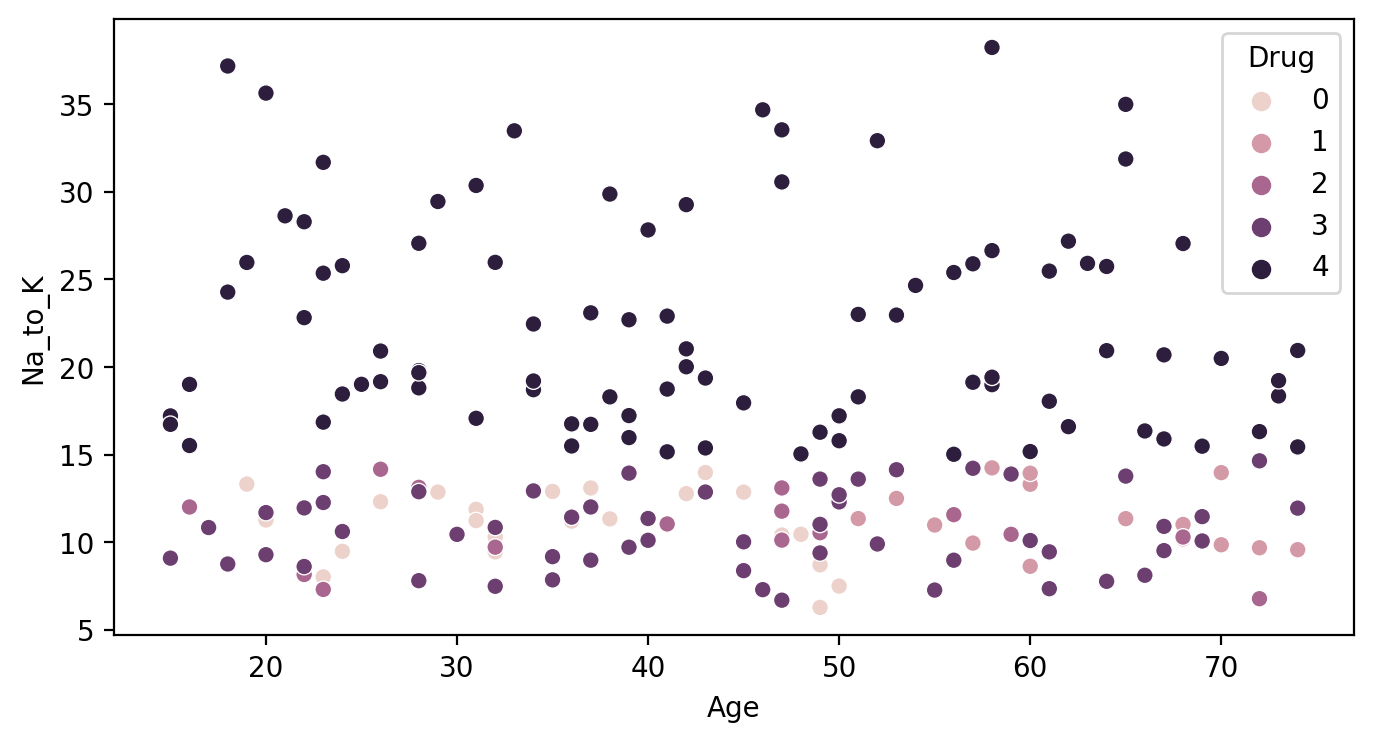

In [ ]:
plt.figure(figsize = (8,4),dpi = 200)
sns.scatterplot(data = df , x = 'Age' , y = 'Na_to_K',hue = 'Drug')

In [ ]:
X = df.drop("Drug", axis = 1)
y = df['Drug']

In [ ]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
66,29,1,0,0,12.856
144,39,1,0,0,9.664
118,32,0,0,1,10.292
110,50,1,0,0,7.490
36,32,1,0,1,9.445
...,...,...,...,...,...
74,31,1,0,1,17.069
73,41,0,2,1,22.905
71,28,0,2,0,19.675
68,54,1,2,0,24.658


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()


In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.shape

(160, 5)

In [ ]:
X_test.shape

(40, 5)

In [ ]:
y_train.shape

(160,)

In [ ]:
y_test.shape

(40,)

In [ ]:
y_pred = regressor.predict(X_test)

y_pred

array([2.70023934, 1.73473718, 1.32350492, 3.44366096, 3.48753564,
       2.26403716, 2.77739513, 5.42397458, 4.33881012, 1.49988327,
       3.08853435, 4.84616467, 3.74986128, 2.16469356, 4.93361366,
       3.2044438 , 2.76375174, 2.63221962, 2.54910653, 2.18900365,
       4.16094772, 1.28799736, 4.06130855, 3.14904957, 2.65136699,
       3.63835628, 2.82384425, 2.91249139, 3.87284042, 5.32784329,
       1.53934208, 0.99958767, 2.60139457, 2.5823745 , 2.71167071,
       2.09520397, 5.34800255, 2.19737732, 3.04507619, 2.48805319])

In [ ]:
y_test

197    3
83     0
142    1
13     4
178    4
190    4
111    3
128    4
122    4
18     2
114    3
98     4
62     4
105    3
93     4
119    4
159    3
23     4
39     3
112    3
172    4
76     0
28     4
14     3
145    3
198    3
37     3
113    3
177    4
185    4
46     0
140    0
135    3
103    3
25     4
63     3
131    4
59     4
4      4
95     3
Name: Drug, dtype: int32

In [ ]:
pred_y = abs(y_test - y_pred).to_frame().apply(int, axis=1).to_frame()
pred_y.value_counts()

C:\Users\405\AppData\Local\Temp\ipykernel_3476\294803371.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  pred_y = abs(y_test - y_pred).to_frame().apply(int, axis=1).to_frame()


0    30
1    10
Name: count, dtype: int64

In [ ]:
((y_test - y_pred) **2).mean()

0.7871734819137532

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
66,29,1,0,0,12.856,0
144,39,1,0,0,9.664,0
118,32,0,0,1,10.292,0
110,50,1,0,0,7.490,0
36,32,1,0,1,9.445,0
...,...,...,...,...,...,...
74,31,1,0,1,17.069,4
73,41,0,2,1,22.905,4
71,28,0,2,0,19.675,4
68,54,1,2,0,24.658,4


In [ ]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
66,29,1,0,0,12.856
144,39,1,0,0,9.664
118,32,0,0,1,10.292
110,50,1,0,0,7.490
36,32,1,0,1,9.445
...,...,...,...,...,...
74,31,1,0,1,17.069
73,41,0,2,1,22.905
71,28,0,2,0,19.675
68,54,1,2,0,24.658


In [ ]:
y

66     0
144    0
118    0
110    0
36     0
      ..
74     4
73     4
71     4
68     4
99     4
Name: Drug, Length: 200, dtype: int32

In [ ]:
new_data=np.array([41,0,2,1,22.905])

In [ ]:
new_data

array([41.   ,  0.   ,  2.   ,  1.   , 22.905])

In [ ]:
new_data = new_data.reshape(1, 5)

In [ ]:
new_data

array([[41.   ,  0.   ,  2.   ,  1.   , 22.905]])

In [ ]:
int(regressor.predict(new_data))


c:\Users\405\anaconda3\envs\app_dash\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4

In [ ]:
import joblib 

In [ ]:
joblib.dump(regressor, 'regressor.pkl')

['regressor.pkl']